In [31]:
import numpy as np
from sklearn.mixture import GaussianMixture
import cv2


In [32]:
img = cv2.imread('F:\\internship\\weld bead\\5.jpg')
X = np.array(img)

In [33]:
n  = np.squeeze(X)

In [34]:
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
X = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [35]:
#i = cv2.resize(img,(4,4))

In [36]:
#X = np.reshape(rimg,2)

In [37]:
gm = GaussianMixture(n_components=2, random_state=42).fit(n , X)
gm.means_

ValueError: Found array with dim 3. Estimator expected <= 2.

In [38]:
img = cv2.imread('F:\\internship\\weld bead\\5.jpg')

In [39]:
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5,5,num=20)

In [41]:
X1 = np.array(img)

In [48]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(1)
n = 100
l = 256
#im = np.zeros((l, l))
im = cv2.imread('F:\\internship\\weld bead\\11.jpg')
points = l*np.random.random((500, n**1))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Unsupported dtype

<Figure size 792x288 with 3 Axes>

# K-Means Clustering

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
image = cv2.imread("F:\\internship\\weld bead\\5.jpg")

In [51]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [60]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [61]:
print(pixel_values.shape)

(69384, 3)


In [62]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [63]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [64]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [65]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

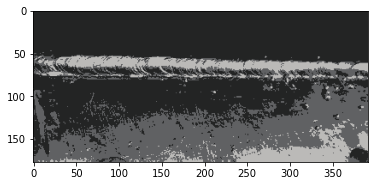

In [66]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

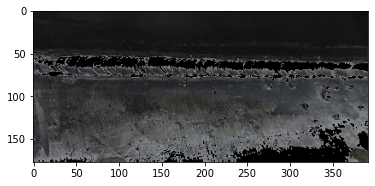

In [67]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [73]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(segmented_image)
labels = gmm.predict(img)
plt.scatter(img[:, 5], img[:, 5], c=labels, s=40, cmap='viridis');


ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

#Prepare parameters for a 4-components HMM
#Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
#The transition matrix, note that there are no transitions possible
#between component 1 and 3
img = cv2.imread('F:\\internship\\weld bead\\5.jpg')
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
#The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

# Generate samples
X, Z = model.sample(1000)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [ ]:
from PIL import Image
from numpy import asarray
img = Image.open('F:\\internship\\weld bead\\5.jpg')
numpydata = asarray(img)
  
# data
print(numpydata)

In [ ]:
import numpy as np
from hmmlearn import hmm

startprob = np.array([0.6, 0.3, 0.1])
transmat = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
means = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
covars = np.tile(np.identity(2), (3, 1, 1))
model = hmm.GaussianHMM(3, "full", startprob, transmat)
model.means_ = means
model.covars_ = covars
X, Z = model.sample(1)

model2 = hmm.GaussianHMM(3, "full")
model2.fit([X]) 
#GaussianHMM(algorithm='viterbi',...
Z2 = model2.predict(X)

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from PIL import Image
from numpy import asarray

np.random.seed(1)
n = 100
l = 2560
#im = np.zeros((l, l))

img = Image.open('F:\\internship\\weld bead\\5.jpg')
numpydata = asarray(img)
im = numpydata
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

In [74]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Clustering_gmm.csv'